In [221]:
import pandas as pd
import seaborn as sns
import numpy as np

## Check summary table

In [222]:
df = pd.read_csv('data/fresno and la parcel categories.csv')

In [223]:
len(df)

50

In [224]:
df.head()

,Unnamed: 0,lot_size_cat.x,max_height_cat.x,avg_setback_cat.x,max_unit_sqft_cat.x,count.x,avg_max_du_final.x,cat_key,lot_size_cat.y,max_height_cat.y,avg_setback_cat.y,max_unit_sqft_cat.y,count.y,avg_max_du_final.y
0,1,<10000,<=40,<7,>6000,604,9.968543,<10000 <=40 <7 >6000,<10000,<=40,<7,>6000,206.0,17.033981
1,2,<10000,<=40,<=10,<=6000,46198,6.615113,<10000 <=40 <=10 <=6000,NaN,NaN,NaN,NaN,NaN,NaN
2,3,<10000,<=40,<=10,>6000,1359,12.434143,<10000 <=40 <=10 >6000,NaN,NaN,NaN,NaN,NaN,NaN
3,4,<10000,<=40,>10,<=6000,342,7.219298,<10000 <=40 >10 <=6000,<10000,<=40,>10,<=6000,1380.0,6.560145
4,5,<10000,<=40,>10,>6000,80,25.300000,<10000 <=40 >10 >6000,NaN,NaN,NaN,NaN,NaN,NaN


In [225]:
la_cat = df.groupby(['lot_size_cat.x', 'max_unit_sqft_cat.x']).agg({'count.x':'sum', 'avg_max_du_final.x': ['mean','std']}).reset_index()
la_cat.columns = ['lot_size_cat', 'max_unit_sqft_cat', 'count_sum', 'max_du_final_mean', 'max_du_final_std']
la_cat['city'] = 'la'

In [226]:
fresno_cat = df.groupby(['lot_size_cat.y', 'max_unit_sqft_cat.y']).agg({'count.y':'sum', 'avg_max_du_final.y': ['mean','std']}).reset_index()
fresno_cat.columns = ['lot_size_cat', 'max_unit_sqft_cat', 'count_sum', 'max_du_final_mean', 'max_du_final_std']
fresno_cat['city'] = 'fresno'

In [227]:
la_cat

,lot_size_cat,max_unit_sqft_cat,count_sum,max_du_final_mean,max_du_final_std,city
0,<10000,<=6000,68110,6.741135,0.334961,la
1,<10000,>6000,27881,17.178428,8.341762,la
2,<2000,<=6000,17992,2.301999,0.567320,la
3,<4000,<=6000,24652,5.285636,1.895736,la
4,<4000,>6000,132,12.752863,0.210319,la
5,>=10000,<=6000,766,25.301057,25.506776,la
6,>=10000,>6000,7992,68.486143,36.760997,la


In [228]:
fresno_cat

,lot_size_cat,max_unit_sqft_cat,count_sum,max_du_final_mean,max_du_final_std,city
0,<10000,<=6000,1408.0,6.297930,0.370828,fresno
1,<10000,>6000,494.0,15.653184,8.633867,fresno
2,<2000,<=6000,3109.0,2.312014,1.575458,fresno
3,<4000,<=6000,484.0,5.517784,3.412427,fresno
4,>=10000,<=6000,171.0,10.877193,NaN,fresno
5,>=10000,>6000,1411.0,150.491210,92.031518,fresno


In [229]:
df = pd.concat([la_cat, fresno_cat])

<Axes: xlabel='lot_size_cat', ylabel='max_du_final_mean'>

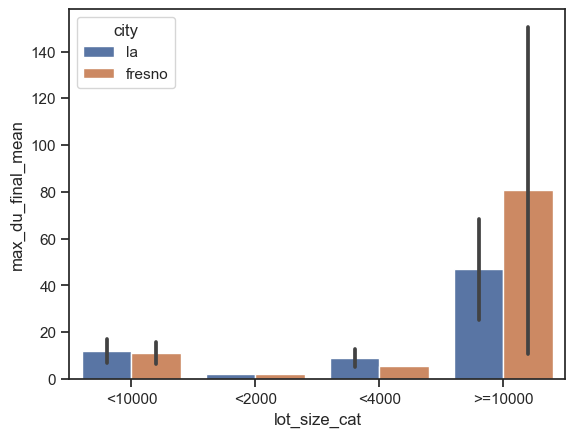

In [230]:
sns.barplot(data = df, x = 'lot_size_cat', y = 'max_du_final_mean', hue = 'city')

## Check Full table

In [231]:
df_full = pd.read_csv('data/parcel_categories_comb.csv')

In [232]:
df_full.head()

,Unnamed: 0,source,max_du_final,lot_size_sqft,lot_size_cat,max_height_ft,max_height_cat,avg_setback,avg_setback_cat,max_far,max_dua,max_unit_sqft,max_unit_sqft_cat
0,1,fresno,1,628.2133,<2000,40,<=40,11.0,>10,NaN,16.0,253.823556,<=6000
1,2,fresno,2,1885.1280,<2000,40,<=40,11.0,>10,NaN,16.0,761.667879,<=6000
2,3,fresno,25,28380.0400,>=10000,40,<=40,11.0,>10,NaN,16.0,11466.682828,>6000
3,4,fresno,7,7438.6320,<10000,40,<=40,11.0,>10,NaN,16.0,3005.507879,<=6000
4,5,fresno,10,11255.2700,>=10000,40,<=40,11.0,>10,NaN,16.0,4547.583838,<=6000


In [233]:
len(df_full)

154664

In [234]:
df_full.describe()

,Unnamed: 0,max_du_final,lot_size_sqft,max_height_ft,avg_setback,max_far,max_dua,max_unit_sqft
count,154664.000000,154664.000000,1.546640e+05,154664.000000,154664.000000,149406.000000,152783.000000,1.546640e+05
mean,77332.500000,10.961614,6.941517e+03,40.145451,9.735262,2.825568,37.080829,6.396438e+03
std,44647.795354,48.815027,2.037165e+04,7.778025,1.324852,0.505091,28.464744,2.187334e+04
min,1.000000,0.000000,1.174716e-01,30.000000,2.000000,0.200000,0.045677,4.307288e-02
25%,38666.750000,4.000000,3.254232e+03,33.000000,10.000000,3.000000,17.424000,2.077265e+03
50%,77332.500000,6.000000,5.303143e+03,45.000000,10.000000,3.000000,21.780001,2.858505e+03
75%,115998.250000,9.000000,6.749816e+03,45.000000,10.000000,3.000000,54.450001,5.787189e+03
max,154664.000000,6924.000000,1.537914e+06,150.000000,16.250000,6.000000,114.870644,1.537914e+06


### random sample 100 from both data set

In [235]:
df_fresno = df_full.loc[df_full.source == 'fresno']
df_fresno = df_fresno.reset_index()
df_la = df_full.loc[df_full.source == 'la']
df_la = df_la.reset_index()

In [236]:
len(df_fresno)

7139

In [237]:
len(df_la)

147525

### StratifiedKFold 

In [214]:
# import numpy as np
# from sklearn.model_selection import StratifiedShuffleSplit

In [215]:
# sss = StratifiedShuffleSplit(n_splits=5,random_state=0)
# sss.get_n_splits(df_fresno, df_fresno['lot_size_cat'])

# X_train_base=[]
# X_test_base=[]
# Y_train_base=[]
# Y_test_base=[]
# X = df_fresno
# Y = df_fresno['lot_size_cat']

# for train_index, test_index in sss.split(X, Y):

#     X_train, X_test = X.loc[train_index], X.loc[test_index]
#     Y_train, Y_test = Y.loc[train_index], Y.loc[test_index]
    
#     X_train_base.append(X_train)
#     X_test_base.append(X_test)
#     Y_train_base.append(Y_train)
#     Y_test_base.append(Y_test)
    
# fresno_sample = X_train_base[0]

In [217]:
# sss2 = StratifiedShuffleSplit(n_splits=80,random_state=0)
# sss2.get_n_splits(df_la, df_la['lot_size_cat'])

# X_train_base=[]
# X_test_base=[]
# Y_train_base=[]
# Y_test_base=[]

# X = df_la
# Y = df_la['lot_size_cat']

# for train_index, test_index in sss2.split(X, Y):

#     X_train, X_test = X.loc[train_index], X.iloc[test_index]
#     Y_train, Y_test = Y.loc[train_index], Y.iloc[test_index]
    
#     X_train_base.append(X_train)
#     X_test_base.append(X_test)
#     Y_train_base.append(Y_train)
#     Y_test_base.append(Y_test)
    
# la_sample = X_train_base[0]

In [218]:
# len(X_test_base[0])

14753

### Random Sample, size = 100

In [238]:
# random sample with Pandas
fresno_sample = df_fresno.sample(n=100, random_state = 6)
la_sample = df_la.sample(n=100, random_state = 1)


In [239]:
df_cat = pd.concat([fresno_sample, la_sample])

cat = df_cat.groupby(['source','lot_size_cat', 'max_unit_sqft_cat']).agg({'max_du_final': ['count','mean','std']}).reset_index()

cat.columns = ['source','lot_size_cat', 'max_unit_sqft_cat', 'count', 'max_du_final_mean', 'max_du_final_std']

In [240]:
cat

,source,lot_size_cat,max_unit_sqft_cat,count,max_du_final_mean,max_du_final_std
0,fresno,<10000,<=6000,21,7.809524,2.749892
1,fresno,<10000,>6000,10,26.300000,7.703535
2,fresno,<2000,<=6000,40,1.575000,0.812956
3,fresno,<4000,<=6000,8,3.125000,0.640870
4,fresno,>=10000,<=6000,2,12.500000,0.707107
5,fresno,>=10000,>6000,19,201.105263,249.197578
6,la,<10000,<=6000,36,6.250000,1.155731
7,la,<10000,>6000,27,13.296296,3.255939
8,la,<2000,<=6000,15,2.133333,0.743223
9,la,<4000,<=6000,14,4.142857,1.460092


<Axes: xlabel='lot_size_cat', ylabel='max_du_final_mean'>

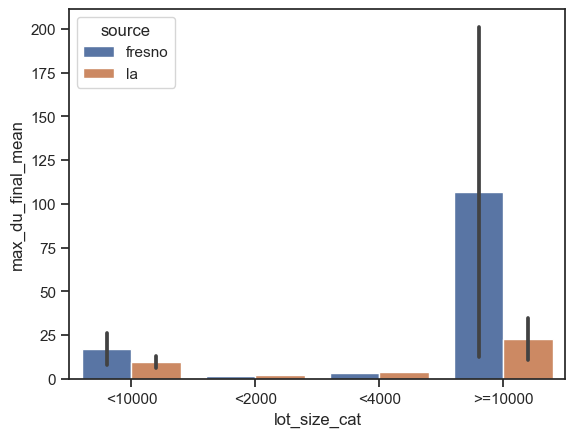

In [241]:
sns.barplot(data = cat, x = 'lot_size_cat', y = 'max_du_final_mean', hue = 'source')

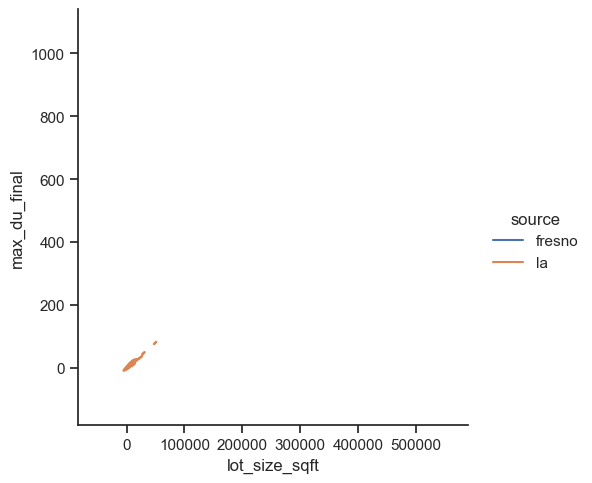

In [242]:
sns.set_theme(style = 'ticks')
sns.displot(data = df_cat, x = 'lot_size_sqft', y = 'max_du_final', hue = 'source', kind = 'kde')

### BOX-COX TRANSFORM

#### transform lot size to gaussian distribution

In [248]:
from scipy import stats

fitted_lot_size, fitted_lambda = stats.boxcox(df_full.loc[df_full.source == 'fresno', 'lot_size_sqft'])

df_full.loc[df_full.source == 'fresno', 'fitted_lot_size'] = fitted_lot_size

fitted_lot_size, fitted_lambda = stats.boxcox(df_full.loc[df_full.source == 'la', 'lot_size_sqft'])
df_full.loc[df_full.source == 'la', 'fitted_lot_size'] = fitted_lot_size

In [253]:
fitted_lambda

0.18691071315085844

#### transform max_du_final to gaussian distribution

In [249]:
from sklearn.preprocessing import PowerTransformer

In [265]:
pt = PowerTransformer(method='box-cox',standardize = False)
df_full['max_du_final'] = df_full['max_du_final']+0.1

fitted_max_du = pt.fit_transform(df_full.loc[df_full.source == 'la', 'max_du_final'].to_numpy().reshape(-1,1))
df_full.loc[df_full.source == 'la', 'fitted_max_du'] = fitted_max_du

fitted_max_du = pt.fit_transform(df_full.loc[df_full.source == 'fresno', 'max_du_final'].to_numpy().reshape(-1,1))
df_full.loc[df_full.source == 'fresno', 'fitted_max_du'] = fitted_max_du

/Users/ivycao/anaconda3/envs/geo_env_m1/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ivycao/anaconda3/envs/geo_env_m1/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='fitted_lot_size', ylabel='Density'>

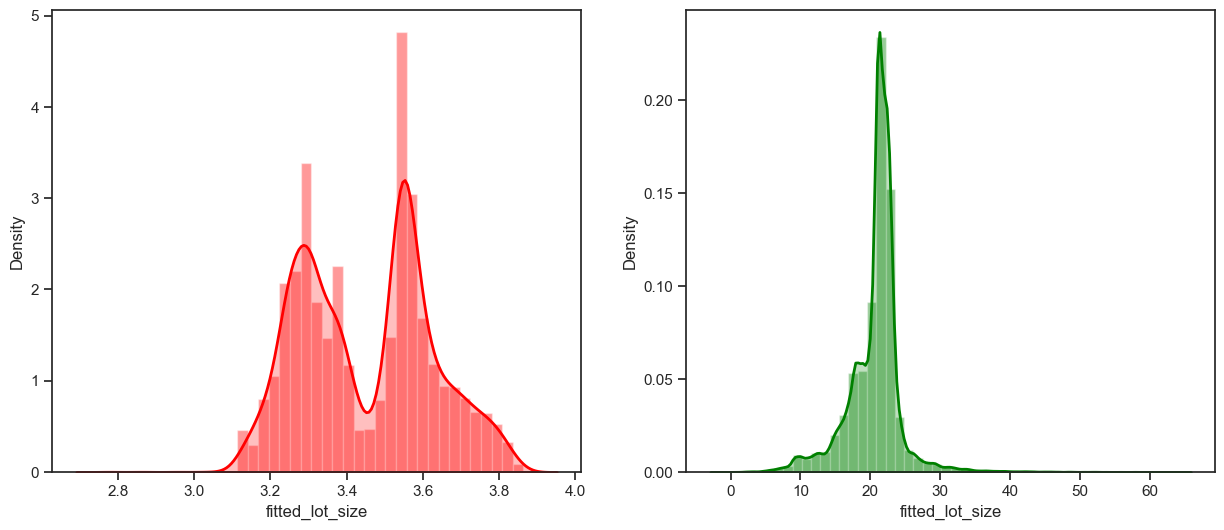

In [266]:
fig, ax = plt.subplots(1, 2,figsize=(15, 6))
sns.distplot(df_full.loc[df_full.source == 'fresno','fitted_lot_size'], hist = True, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="red", ax = ax[0])
sns.distplot(df_full.loc[df_full.source == 'la', 'fitted_lot_size'], hist = True, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[1])

/Users/ivycao/anaconda3/envs/geo_env_m1/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ivycao/anaconda3/envs/geo_env_m1/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='fitted_max_du', ylabel='Density'>

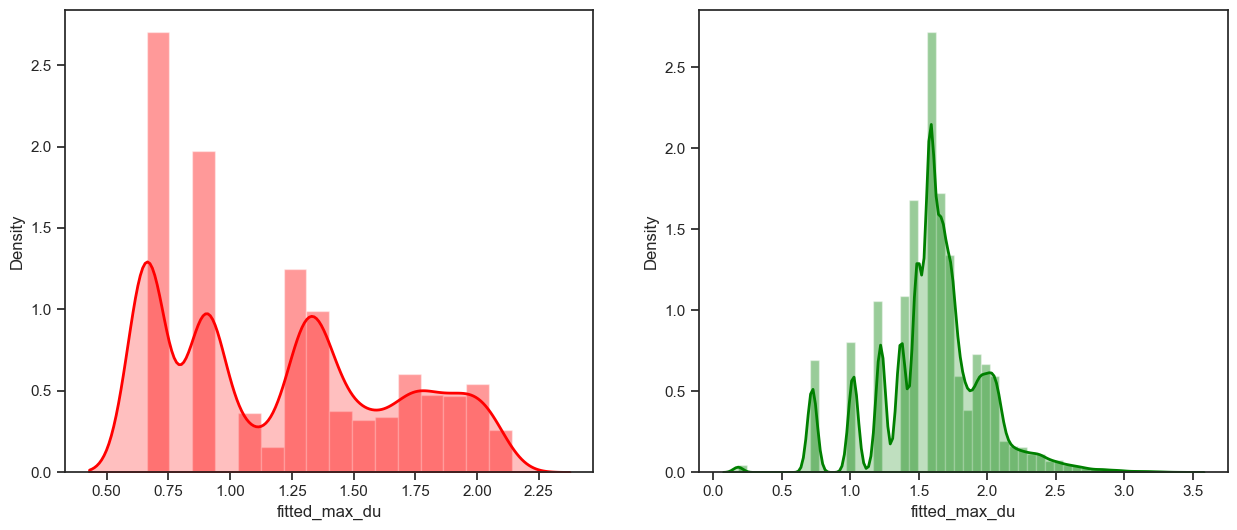

In [267]:
fig, ax = plt.subplots(1, 2,figsize=(15, 6))
sns.distplot(df_full.loc[df_full.source == 'fresno','fitted_max_du'], hist = True, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="red", ax = ax[0])
sns.distplot(df_full.loc[df_full.source == 'la', 'fitted_max_du'], hist = True, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[1])

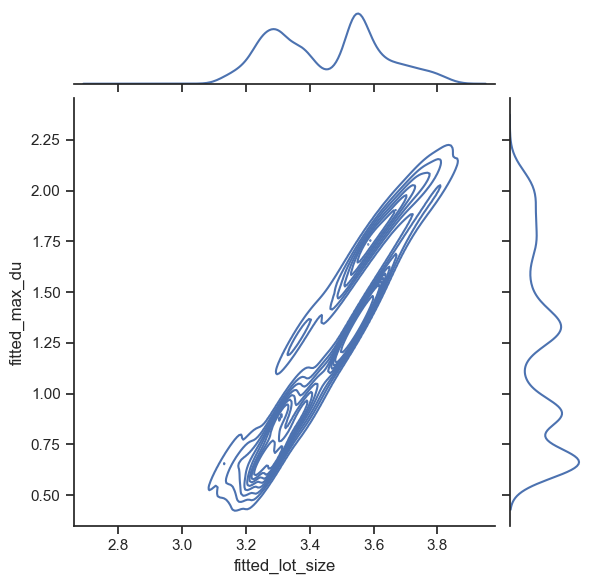

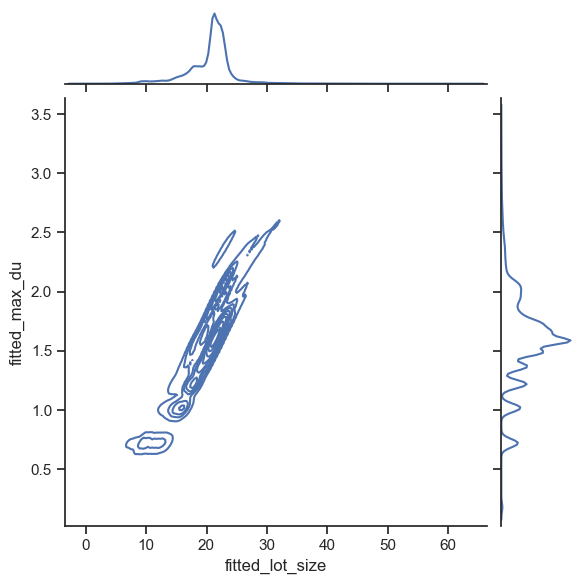

In [268]:
sns.set_theme(style = 'ticks')
sns.jointplot(data=df_full.loc[df_full.source == 'fresno'], x="fitted_lot_size", y="fitted_max_du", kind="kde")
sns.jointplot(data=df_full.loc[df_full.source == 'la'], x="fitted_lot_size", y="fitted_max_du", kind="kde")

### Check pred values. 


In [309]:
df = pd.read_csv('data/fresno_hidensity_predicted_maxdu.csv')

In [310]:
df.head()

,Unnamed: 0,max_du_final,preds,lot_size_sqft,max_height_ft,avg_setback,max_unit_sqft,diff
0,4484,6924,2059.934550,1537914.0,75,3,1537914.0,4864.065450
1,3595,4679,1395.015297,1041494.0,75,3,1041494.0,3283.984703
2,4491,3926,1171.877841,874902.5,75,3,874902.5,2754.122159
3,7107,3327,993.968878,742078.0,75,3,742078.0,2333.031122
4,3375,3028,905.317576,675892.1,75,3,675892.1,2122.682424


In [311]:
pred = df.loc[df.lot_size_sqft<10000]

In [321]:
len(pred['diff'])

5557

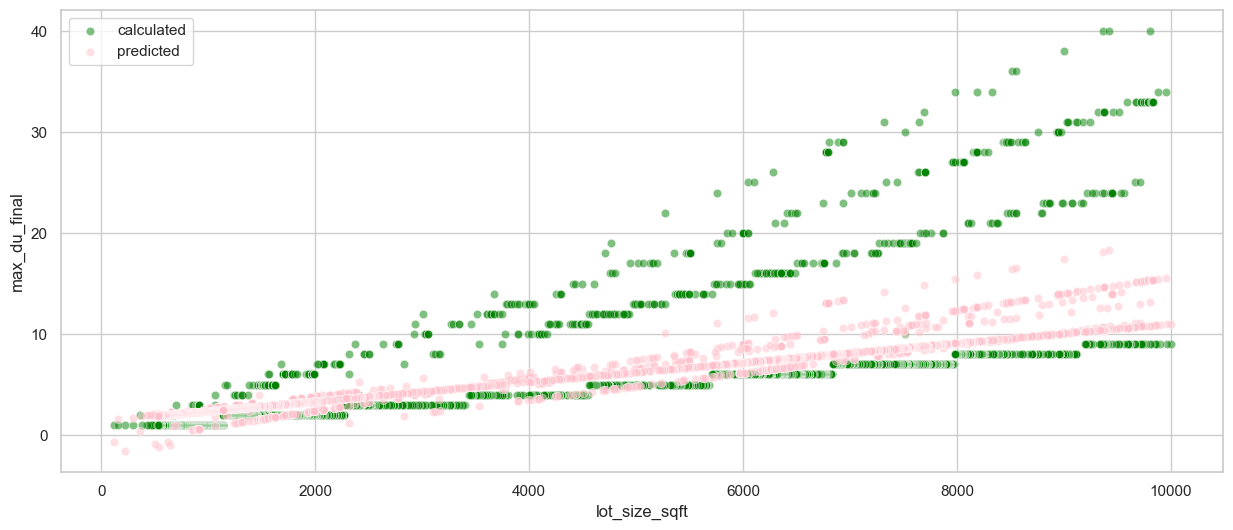

In [324]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.scatterplot(data=pred, y = 'max_du_final', x = 'lot_size_sqft', color = 'green',alpha = 0.5)
sns.scatterplot(data=pred, y = 'preds', x = 'lot_size_sqft', color = 'pink',alpha = 0.5)
plt.legend(labels=['calculated', 'predicted'])

In [314]:
pred_sort = pred.sort_values(by=['lot_size_sqft'])

In [322]:
len(pred_sort)

5557

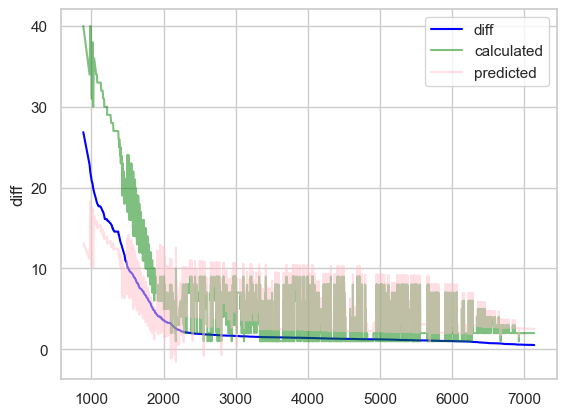

In [325]:
sns.set_style('whitegrid')
sns.lineplot(data=pred_sort['diff'],color = 'blue')
sns.lineplot(data=pred_sort['max_du_final'],color = 'green',alpha = 0.5)
sns.lineplot(data=pred_sort['preds'],color = 'pink',alpha = 0.5)
plt.legend(labels=['diff', 'calculated', 'predicted'])